In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

396
[0.53043075416836938, 0.37469769781994861, 0.81514483595437193, 0.83905088499537717, 0.61085199061772189]


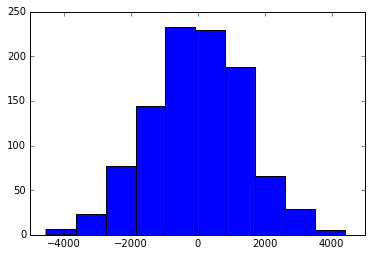

In [47]:
##############Define dataset#############
num_variables = 5
num_samples = 1000
##Correlation matrix
cov = [[1.0, 0.3, 0.1, 0.2, 0.3], 
       [0.3, 1.0, 0.1, 0.1, 0.2], 
       [0.1, 0.1, 1.0, 0.9, 0.5], 
       [0.2, 0.1, 0.9, 1.0, 0.6], 
       [0.3, 0.2, 0.5, 0.6, 1.0]]
mean = [0, 0, 0, 0, 0]
std_dev = [1, 1, 1, 1, 1]
##To ensure results remain consistent between runs for the same user definations
random_state = 23
##############Define dataset#############

rnd = np.random.RandomState(random_state)

## Creating cholesky decomposition matrix from correlation structure
L = np.linalg.cholesky(cov)

## Creating base dataset derived from standard normal distribution
uncorrelated = rnd.standard_normal((num_variables, num_samples))

## Imposing desired correlation structure on base dataset
correlated = np.dot(L, uncorrelated)
final_dataset = np.empty((num_variables, num_samples))

## Imposing mean and standard deviation on dataset
for i in range(0,num_variables):
    final_dataset[i] = correlated[i] * std_dev[i] + mean[i]

## Shape of numpy array as required by sklearn    
final_dataset = final_dataset.T

##function to created dependent variable valuea
def gen_data(inp, param, noise=0, n_outliers=0, random_state=0):
    rnd = np.random.RandomState(random_state)
    t=np.copy(inp.T)
    ##Reducing the effect of one the predictors
    dependence_reducer = rnd.randint(0, len(t[0]), 500)
    t[1][dependence_reducer] *= 0
    print(len(np.where(t[1] == 0)[0]))
    ##Parametric relation between dependant variable and predictors
    y = param[0] * (t[0]) + param[1] * (t[1]) + param[2] * (t[2]) + param[3] * (t[3]) + param[5]
    
    ##Generating gaussian error
    error = noise * rnd.randn(len(t[0]))
    ##Randomly assigning outlier positions
    outliers = rnd.randint(0, len(t[0]), n_outliers)
    error[outliers] *= 3
    #print(error)
    return y + error

##Model parameters
param = [555, 555, 555, 555, 555, 100]
noise = 100
n_outliers = 50

##Creating indendent predictor variables
t_train = np.array([[randrange(5,200) for x in range(0,num_samples)],[randrange(400,800) for x in range(0,num_samples)]]).T

##Using correlated predictor variables
t_train = final_dataset

y_data = gen_data(t_train, param, noise=noise, n_outliers=n_outliers, random_state=random_state)

#print(pd.DataFrame(y_data).describe())
y_correlation = [(np.corrcoef(y_data,idv)[0][1]) for idv in t_train.T]
print(y_correlation)
plt.hist(y_data.T)


from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    t_train, y_data, test_size=0.33)

In [84]:
df = pd.DataFrame({'x0':t_train.T[0], 'x1':t_train.T[1], 'x2':t_train.T[2], 'x3':t_train.T[3], 'x4':t_train.T[4],'y_train':y_data})
print(df.describe())
df.values

                x0           x1           x2           x3           x4  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.061227    -0.027429    -0.069579    -0.086693    -0.049535   
std       0.962275     1.008724     1.017435     1.028833     0.994567   
min      -2.585524    -3.312303    -2.905680    -3.179148    -3.292991   
25%      -0.697393    -0.702359    -0.778946    -0.750114    -0.744847   
50%      -0.074842    -0.015759    -0.053378    -0.085041    -0.053930   
75%       0.606599     0.660507     0.616083     0.615528     0.612525   
max       3.187503     3.122568     3.236443     3.326127     3.278580   

           y_train  
count  1000.000000  
mean    -27.850612  
std    1418.037767  
min   -4529.499896  
25%    -961.957887  
50%     -10.744699  
75%     939.971282  
max    4384.578122  


array([[  6.66988056e-01,   1.68079599e+00,   1.16737752e+00,
          6.48219022e-01,  -7.47753004e-01,   1.44016429e+03],
       [  2.58130811e-02,  -1.40152721e+00,  -1.34043190e+00,
         -9.44849175e-01,  -8.95162323e-01,  -1.87042375e+03],
       [ -7.77619413e-01,  -4.23962861e-01,   1.05438326e+00,
          1.21285872e+00,   4.26674258e-01,   9.46582013e+02],
       ..., 
       [  9.25886737e-01,   2.92712005e-01,  -9.04861480e-01,
         -3.01790728e-01,   1.57819420e-01,  -2.10589224e+01],
       [  2.61216503e+00,   9.47826948e-01,  -4.63233426e-01,
         -4.65965495e-01,   4.78594808e-02,   8.45172352e+02],
       [  5.61044948e-02,   1.15930896e-01,   5.90503976e-01,
          2.69784802e-01,   7.66073206e-01,   7.14340124e+02]])

In [109]:
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=3, max_iter=100000)
kmns_fit = kmns.fit(df.values)

import sklearn.metrics.pairwise as test
test?

In [107]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan_fit = dbscan.fit(df.values)
dbscan_fit.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [5]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca_res=pca.fit_transform(t_train)
pca=pca.fit(t_train)
pca.components_


array([[-0.21913619, -0.16481722, -0.56774747, -0.59612256, -0.49710695],
       [ 0.65491306,  0.68862813, -0.23119422, -0.20837436, -0.00309054],
       [-0.05651906,  0.26412117,  0.41829676,  0.24345993, -0.83234649],
       [ 0.70775598, -0.64315525, -0.05833829,  0.1671515 , -0.23257219],
       [-0.13767822,  0.12336094, -0.6677099 ,  0.71694188, -0.07736031]])

In [6]:
## finding factor loadings
print([np.corrcoef(pca_res[:,3],var)[0][1] for var in t_train.T])


[0.4142308609026758, -0.37283030951872131, -0.032262053938371442, 0.091233617879457815, -0.1312871009816948]


In [110]:
from statsmodels.formula.api import ols,rlm

df = pd.DataFrame({'x0':pca_res[:,0], 'x1':pca_res[:,1], 'x2':pca_res[:,2], 'x3':pca_res[:,3], 'x4':pca_res[:,4],'y':Y})
ols_fit = ols("y ~ x0+x1+x2+x3+x4+1", df).fit()

print(ols_fit.summary())
print(np.mean((ols_fit.fittedvalues-df.y)**2)**.5)
plt.scatter(Y,ols_fit.fittedvalues-Y)

NameError: name 'pca_res' is not defined

                            OLS Regression Results                            
Dep. Variable:                y_train   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2135.
Date:                Fri, 22 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:16:39   Log-Likelihood:                -4938.8
No. Observations:                 670   AIC:                             9888.
Df Residuals:                     665   BIC:                             9910.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    110.7453     14.979      7.393      0.0

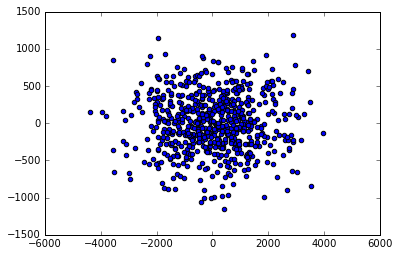

In [112]:
from statsmodels.formula.api import ols,rlm

df = pd.DataFrame({'x0':x_train.T[0], 'x1':x_train.T[1], 'x2':x_train.T[2], 'x3':x_train.T[3], 'x4':x_train.T[4],'y_train':y_train})
ols_fit = ols("y_train ~ x0+x1 +x3+x4+1", df).fit()
df_test = pd.DataFrame({'x0':x_test.T[0], 'x1':x_test.T[1], 'x2':x_test.T[2], 'x3':x_test.T[3], 'x4':x_test.T[4],'y_test':y_test})
print(ols_fit.summary())
print(np.mean((ols_fit.fittedvalues-df.y_train)**2)**.5)
print(plt.scatter(ols_fit.fittedvalues,ols_fit.fittedvalues-y_train))
print(np.mean((ols_fit.predict(df_test)-y_test)**2)**.5)


[ 0.18607222  0.09666492  0.61378969  0.10347318]
414.023744938
2.08541816473e-11
[[ 1.          0.95444482]
 [ 0.95444482  1.        ]]


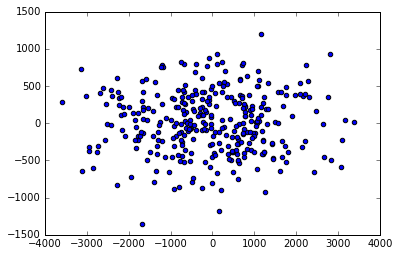

In [113]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(n_estimators=1000,random_state=0)
forest_fit = forest.fit(x_train[:,[0,1,3,4]], y_train)
importances = forest_fit.feature_importances_
print(importances)
print(np.mean((forest_fit.predict(x_test[:,[0,1,3,4]])-y_test)**2)**.5)
print(np.mean((forest_fit.predict(x_train[:,[0,1,3,4]])-y_train)**2)**.5)
print(np.corrcoef(forest_fit.predict(x_test[:,[0,1,3,4]]),y_test))
plt.scatter(forest_fit.predict(x_test[:,[0,1,3,4]]),forest_fit.predict(x_test[:,[0,1,3,4]])-y_test)

[  482.29804089   404.83728791  1076.3931414    -21.16622916]
0.935387369255


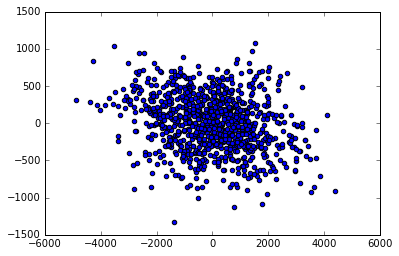

In [92]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm_fit = lm.fit(t_train[:,[0,1,3,4]], y_data)
print(lm_fit.coef_)
print(lm_fit.score(t_train[:,[0,1,3,4]], y_data))
plt.scatter(y_data, lm_fit.predict(t_train[:,[0,1,3,4]]) - y_data)

[ 0.22855545  0.36529011  0.25998944  0.146165  ]
428.536932077
249.441754523
[[ 1.          0.95110454]
 [ 0.95110454  1.        ]]


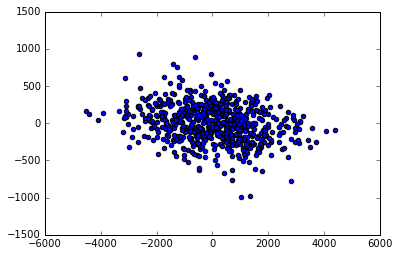

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(loss='huber',n_estimators=147)
gbm_fit = gbm.fit(x_train[:,[0,1,3,4]], y_train)
importances = gbm_fit.feature_importances_
print(importances)
print(np.mean((gbm_fit.predict(x_test[:,[0,1,3,4]])-y_test)**2)**.5)
print(np.mean((gbm_fit.predict(x_train[:,[0,1,3,4]])-y_train)**2)**.5)
print(np.corrcoef(gbm_fit.predict(x_test[:,[0,1,3,4]]),y_test))
plt.scatter(y_train,gbm_fit.predict(x_train[:,[0,1,3,4]])-y_train)

### Bagging Implementation

In [66]:

from tqdm import tqdm
coef = [0,0,0,0]
comb=np.concatenate((t_train,Y.reshape(1000,1)),axis=1)
for i in tqdm(range(0,100)):
    resampled = resample(comb,n_samples=1000)
    lm = LinearRegression()
    lm_fit = lm.fit(resampled[:,[0,1,3,4]],resampled[:,-1])
    coef+=lm_fit.coef_

print(coef/100)
    

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 699.26it/s]


[  482.11410316   404.16772197  1075.43007128   -20.61324983]


In [86]:
from sklearn.grid_search import RandomizedSearchCV

rndmCV = RandomizedSearchCV(gbm,{'n_estimators':range(10,200)})
rndmCV_fit = rndmCV.fit(df[[0,1,3,4]].values,df.y_train.values)



In [100]:
pd.dropna

SyntaxError: invalid syntax (<ipython-input-100-985fae20e76c>, line 1)